#  –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏

–ö–æ–º–ø–∞–Ω–∏—è ¬´–ß—ë—Ç–µ–Ω—å–∫–æ–µ —Ç–∞–∫—Å–∏¬ª —Å–æ–±—Ä–∞–ª–∞ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –æ –∑–∞–∫–∞–∑–∞—Ö —Ç–∞–∫—Å–∏ –≤ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞—Ö. –ß—Ç–æ–±—ã –ø—Ä–∏–≤–ª–µ–∫–∞—Ç—å –±–æ–ª—å—à–µ –≤–æ–¥–∏—Ç–µ–ª–µ–π –≤ –ø–µ—Ä–∏–æ–¥ –ø–∏–∫–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏, –Ω—É–∂–Ω–æ —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ —Ç–∞–∫—Å–∏ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π —á–∞—Å. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –º–æ–¥–µ–ª—å –¥–ª—è —Ç–∞–∫–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ *RMSE* –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –Ω–µ –±–æ–ª—å—à–µ 48.


## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞

In [1]:
import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

–ü–æ–¥–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ

In [2]:
pth = '/datasets/taxi.csv'
if os.path.exists(pth):
    data = pd.read_csv(pth,index_col=[0],parse_dates=[0])
data = data.sort_index(ascending=True)
print(data.index.is_monotonic)

NameError: name 'data' is not defined

–ó–Ω–∞—á–∏—Ç, —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –ø–æ—Ä—è–¥–æ–∫ —Å–æ–±–ª—é–¥–µ–Ω.

In [3]:
data = data.resample('1H').sum()
display(data)

num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43
...                         ...
2018-08-31 19:00:00         136
2018-08-31 20:00:00         154
2018-08-31 21:00:00         159
2018-08-31 22:00:00         223
2018-08-31 23:00:00         205

[4416 rows x 1 columns]

## –ê–Ω–∞–ª–∏–∑

In [4]:
print(data.info())
print(data['num_orders'].unique())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None
[124  85  71  66  43   6  12  15  34  69  64  96  30  32  48  44  73  45
  61 113  58  90 120  75  20  11   7  46  54  91  36  59  82  83  89  49
  93 101 119  72 163 108  25   9  17  56  52  57  28  41  76  68  63  60
  26  42  27  22  39  19  51  80  77  86 176  16   3  14  31  50  62  37
  40  47  10  81 100 121  24  38  55  99 127  94 143  78  65  97 114  88
  79  84  29   1   4  70 117   5  18  53 102  33 107 118 153 105  67  35
 109  21   8 123 110 134 133 137 126  13  74  95 139  87 106  92 148 182
 104 131  98   2 112 103 128 166 111  23   0 129 164 165 138 142 159 115
 130 135 150 167 147 253 140 172 116 125 162 201 136 146 154 145 155 158
 156 193 197 234 157 122 144 149

In [5]:
print(data.isna().sum())
print(data.duplicated().sum())

num_orders    0
dtype: int64
4165


In [6]:
display(data[data.duplicated()])

num_orders
datetime                       
2018-03-01 15:00:00          66
2018-03-01 16:00:00          43
2018-03-01 21:00:00          66
2018-03-02 03:00:00          64
2018-03-02 06:00:00          11
...                         ...
2018-08-31 19:00:00         136
2018-08-31 20:00:00         154
2018-08-31 21:00:00         159
2018-08-31 22:00:00         223
2018-08-31 23:00:00         205

[4165 rows x 1 columns]

In [7]:
print(data.index.duplicated().sum())

0


–î–∞–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã.

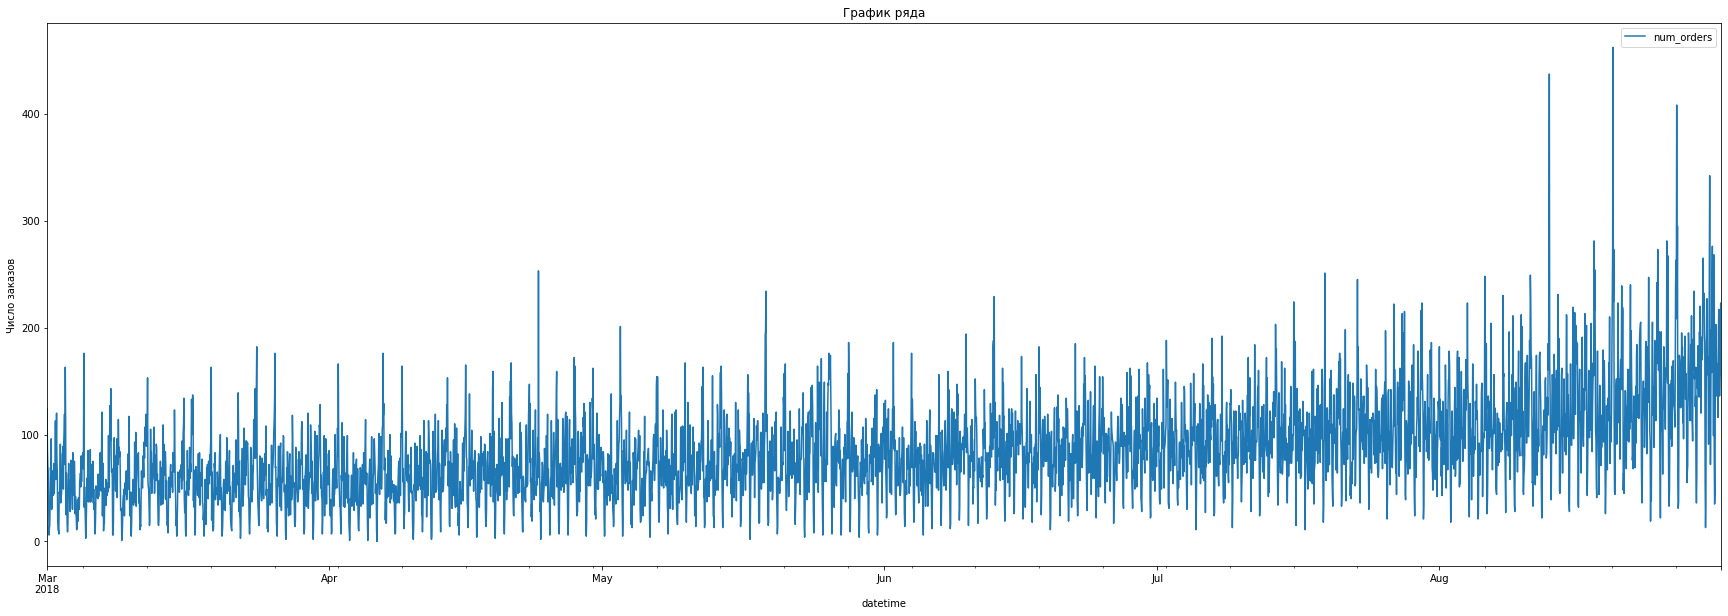

In [8]:
plt.figure(figsize=(30,10))
plt.title('–ì—Ä–∞—Ñ–∏–∫ —Ä—è–¥–∞')
plt.ylabel('–ß–∏—Å–ª–æ –∑–∞–∫–∞–∑–æ–≤')
plt.xlabel('–í—Ä–µ–º—è')
data.plot(ax=plt.gca());

–ö–∞–∫ –º—ã –º–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, —Ä—è–¥ —Ä–∞—Å—Ç–µ—Ç —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏.

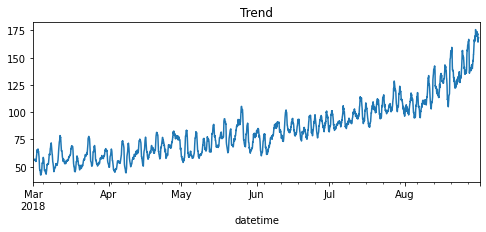

In [9]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(8,10))
plt.subplot(311)
plt.title('Trend')
decomposed.trend.plot(ax=plt.gca());


–ú—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —Ä—è–¥ —Ä–∞—Å—Ç–µ—Ç —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏.–ü–µ—Ä–∏–æ–¥ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ - –¥–Ω–µ–≤–Ω–∞—è.

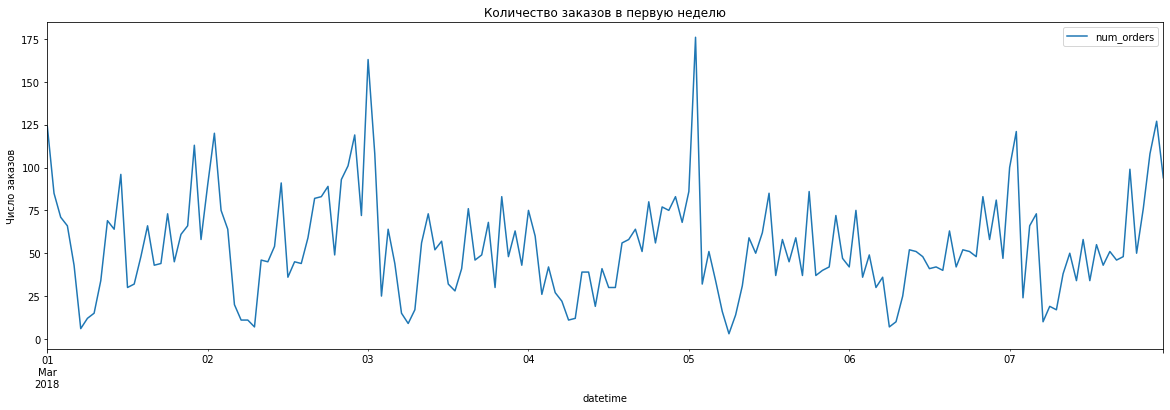

In [10]:
plt.figure(figsize=(20,6))
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ –ø–µ—Ä–≤—É—é –Ω–µ–¥–µ–ª—é')
plt.ylabel('–ß–∏—Å–ª–æ –∑–∞–∫–∞–∑–æ–≤')
plt.xlabel('–í—Ä–µ–º—è')
data[:168].plot(ax=plt.gca())
plt.show()


1) –ü–∏–∫–∏ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –¥–Ω—è, –Ω–∞ —ç—Ç–æ –≤—Ä–µ–º—è ,–≤–∏–¥–∏–º–æ, –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–µ–µ —á–∏—Å–ª–æ –ø–æ–ª–µ—Ç–æ–≤. –ê —Ç–∞–∫–∂–µ –Ω–æ—á—å—é(–ø–∏–∫ —Å 22 –¥–æ 2).–°–ø–∞–¥—ã –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è —É—Ç—Ä–æ–º –∏ –±–ª–∏–∂–µ –∫ –≤–µ—á–µ—Ä—É.–ú–æ–∂–µ—Ç —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º —á—Ç–æ —Ç–∞–∫—Å–∏ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –¥–æ—Ä–æ–≥–∏–º –∏–∑-–∑–∞ –ø—Ä–æ–±–æ–∫( —Ç –∫ –Ω–∞ —ç—Ç–æ –≤—Ä–µ–º—è –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è —á–∞—Å –ø–∏–∫).–ü–æ—ç—Ç–æ–º—É —Ç–∞–∫—Å–∏ –Ω–µ –≤—ã–≥–æ–¥–Ω–æ –±—Ä–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–∞–º.
    2)–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–∞ —Ä–∞–±–æ—Ç–æ–π –∏ –æ—Ç–¥—ã—Ö–æ–º –ª—é–¥–µ–π.–ú–Ω–æ–≥–∏–µ –ø—Ä–∏–ª–µ—Ç–∞—é—Ç –≤ –¥—Ä—É–≥–∏–µ –≥–æ—Ä–æ–¥–∞ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –Ω–µ–¥–µ–ª–∏ –ø–æ —Ä–∞–±–æ—Ç–µ.–î—Ä—É–≥–∏–µ —É–ª–µ—Ç–∞—é—Ç 


 1) –ü–∏–∫–∏ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –Ω–µ–¥–µ–ª–∏, –∞ —Ç–∞–∫–∂–µ –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã—Ö.–°–ø–∞–¥—ã –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –≤ –Ω–∞—á–∞–ª–µ –Ω–µ–¥–µ–ª –∏ —Å–µ—Ä–µ–¥–∏–Ω–µ.
 2)–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–∞ —Ä–∞–±–æ—Ç–æ–π –∏ –æ—Ç–¥—ã—Ö–æ–º –ª—é–¥–µ–π.–ú–Ω–æ–≥–∏–µ –ø—Ä–∏–ª–µ—Ç–∞—é—Ç –≤ –¥—Ä—É–≥–∏–µ –≥–æ—Ä–æ–¥–∞ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –Ω–µ–¥–µ–ª–∏ –ø–æ —Ä–∞–±–æ—Ç–µ.–î—Ä—É–≥–∏–µ —É–ª–µ—Ç–∞—é—Ç –∏ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç—Å—è –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã—Ö.–ü–æ—ç—Ç–æ–º—É —Ç–∞–∫ –º–Ω–æ–≥–æ –∑–∞–∫–∞–∑–æ–≤ –Ω–∞ —Ç–∞–∫—Å–∏.

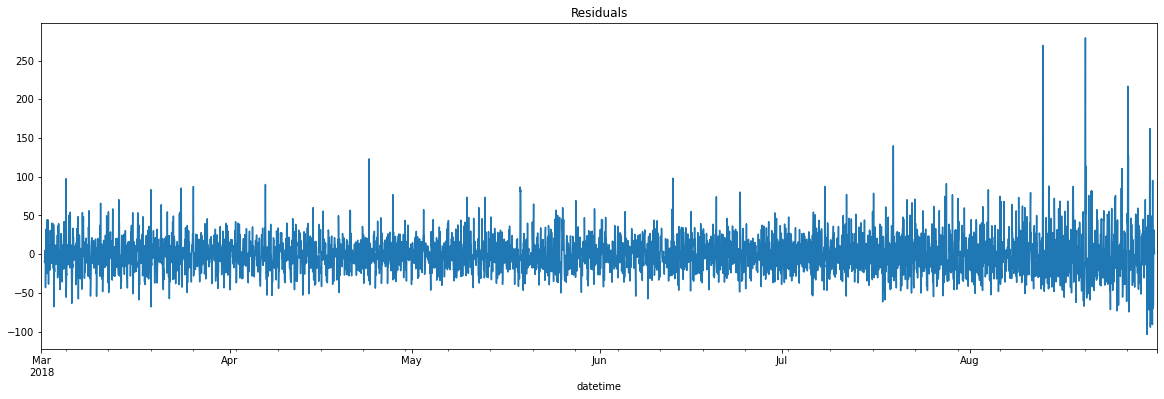

In [11]:
plt.figure(figsize=(20,6))
plt.title('Residuals')
decomposed.resid.plot(ax=plt.gca())
plt.show()

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞: v.2<a class="tocSkip"></h2>
<b>  –ö–∞–∫ –º—ã –º–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, –æ—Å—Ç–∞—Ç–∫–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–∏–ª—å–Ω—ã–π —Ä–∞–∑–±—Ä–æ—Å.–ê –∑–Ω–∞—á–∏—Ç —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π.

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ù–µ—Ç –≤—ã–≤–æ–¥–∞ –ø—Ä–æ –æ—Å—Ç–∞—Ç–∫–∏ - –≤ –ø–µ—Ä–≤–æ–º –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –ø–æ —ç—Ç–æ–º—É –≤–æ–ø—Ä–æ—Å—É –±—ã–ª –æ–ø–æ—Ä–Ω—ã–π –ø–ª–∞–Ω –¥–ª—è –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø—Ä–æ –æ—Å—Ç–∞—Ç–∫–∏.

</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
–¢—É—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ!
</div>

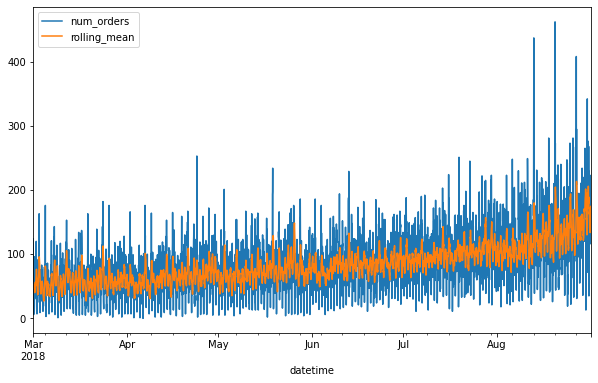

In [12]:
df = data
df['rolling_mean'] = df.rolling(10).mean()
plt.figure(figsize=(10,6))
df.plot(ax=plt.gca())
plt.show()

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞: v.3<a class="tocSkip"></h2>
<b> –ö–∞–∫ –º—ã –º–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Ç–µ—Ç —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–∞—à —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ü–æ —ç—Ç–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É —Ç–∞–∫–∂–µ –Ω–µ—Ç –≤—ã–≤–æ–¥–∞ - —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Ä—è–¥–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∞ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ.

</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ù–µ —É—á—Ç–µ–Ω–æ: —Å—Ç–æ–∏—Ç –¥–æ–±–∞–≤–∏—Ç—å –≤—ã–≤–æ–¥ –ø–æ —ç—Ç–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É. –ù–∞ —Å–ª—É—á–∞–π, –µ—Å–ª–∏ —Å –Ω–∏–º –µ—Å—Ç—å —Å–ª–æ–∂–Ω–æ—Å—Ç–∏, –ø–æ–¥—Å–∫–∞–∂—É, —á—Ç–æ —Å—Ç–æ–∏—Ç –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç—å —Å–∫–æ–ª—å–∑—è—à–µ–π —Å—Ä–µ–¥–Ω–µ–π: –µ—Å–ª–∏ –æ–Ω–∞ –Ω–µ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏, —Ç–æ —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω, –µ—Å–ª–∏ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è - —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω. –°–¥–µ–ª–∞–π, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –≤—ã–≤–æ–¥ –æ —Å–∫–æ–ª—å–∑—è—â–µ–º —Å—Ä–µ–¥–Ω–µ–º –≤—ã—à–µ.

</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

In [13]:
result = adfuller(data['num_orders'], autolag='AIC')
print('ADF',result[0])
print('p-value',result[1])
print('1%', result[4]['1%'])
print('5%',result[4]['5%'])
print('–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ - —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π')
if result[0] < result[4]['5%']:
    print('–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç–∞ - —Ä—è–¥ –Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π')
else:
    print('–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç–∞ - —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π')

ADF -3.0689242890279558
p-value 0.028940051402612906
1% -3.431842162413052
5% -2.8621993540813637
–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ - —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π
–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç–∞ - —Ä—è–¥ –Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π


<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:<a class="tocSkip"></h2>
<b>  –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–∞—à —Ä—è–¥ –Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–û–∫–µ–π, —Ç–µ—Å—Ç –ø—Ä–æ–≤–µ–ª–∏, –≤—ã–≤–æ–¥ –ø–æ–ª—É—á–∏–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π - —Ç—É—Ç —Ö–æ—Ä–æ—à–æ!
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–ü–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –Ω–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –∞ —Ç–∞–∫–∂–µ –≤—ã–≤–µ–ª–∏ –æ–±—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–∞–±–ª–∏—Ü–µ - –æ–∫–µ–π!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∞—è —á–∞—Å—Ç—å –ø—Ä–æ–µ–∫—Ç–∞ –≤—ã—à–ª–∞ –¥–æ–≤–æ–ª—å–Ω–æ —Å–∫—Ä–æ–º–Ω–æ–π - –µ—ë —Å–ª–µ–¥—É–µ—Ç —Ä–∞—Å—à–∏—Ä–∏—Ç—å. –•–æ—Ä–æ—à–∏–π –∞–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –¥–æ–ª–∂–µ–Ω —Å–æ—Å—Ç–æ—è—Ç—å –∏–∑ –¥–≤—É—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤: EDA –¥–∞–Ω–Ω—ã—Ö –∏ –∞–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.
    
EDA –¥–æ–ª–∂–µ–Ω –≤–∫–ª—é—á–∞—Ç—å:
1. –ê–Ω–∞–ª–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤ - –º–µ—Ç–æ–¥ `isna()` –∏ `.sum()` –ø–æ—Å–ª–µ –Ω–µ–≥–æ –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞.
2. –ê–Ω–∞–ª–∏–∑ —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ - –º–µ—Ç–æ–¥ `.duplicated()` –∏ `.sum()` –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞. –û–¥–Ω–∞–∫–æ –≤–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–º —Ä—è–¥—É –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–∏—Ç—É–∞—Ü–∏—è, –∫–æ–≥–¥–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º - —ç—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ –∞–Ω–æ–º–∞–ª–∏—è. –ï—Å–ª–∏ –¥—É–±–ª–∏–∫–∞—Ç—ã –±—É–¥—É—Ç - –Ω–∞ –Ω–∏—Ö —Å—Ç–æ–∏—Ç –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ —Ç–∞–±–ª–∏—Ü–µ, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞–≤–µ—Ä–Ω—è–∫–∞ - –ø–æ–º–æ–∂–µ—Ç —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –≤–∏–¥–∞ `df[df.duplicated()]`.
3. –ê–Ω–∞–ª–∏–∑ –Ω–µ—è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ - –º–µ—Ç–æ–¥ `.duplicated()`, –Ω–æ –ø—Ä–∏–º–µ–Ω—ë–Ω–Ω—ã–π —É–∂–µ –∫ –∏–Ω–¥–µ–∫—Å—É: –µ—Å–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ä–∞–∑–Ω—ã–µ –¥–Ω–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º, —Ç–æ –¥–≤—É—Ö –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö –¥–∞—Ç –±—ã—Ç—å –Ω–µ –¥–æ–ª–∂–Ω–æ.
    
–ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –¥–æ–ª–∂–µ–Ω –≤–∫–ª—é—á–∞—Ç—å:
1. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ä—è–¥–∞ - —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ —Ö–æ—Ç—è –±—ã –æ–± –æ–±—â–µ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏: —Ä—è–¥ —Ä–∞—Å—Ç—ë—Ç —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏ –∏–ª–∏ –æ—Å—Ç–∞—ë—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω—ã–º?
2. –†—è–¥ –Ω—É–∂–Ω–æ —Ä–∞–∑–ª–æ–∂–∏—Ç—å –Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã (—Ç—Ä–µ–Ω–¥, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, –æ—Å—Ç–∞—Ç–∫–∏) –∏ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å:
    
2.1. –ö–∞–∫–æ–π –≤—ã–≤–æ–¥ –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –ø–æ –∏—Ç–æ–≥—É –∞–Ω–∞–ª–∏–∑–∞ —Ç—Ä–µ–Ω–¥–æ–≤–æ–π –∫–æ–º–ø–Ω–Ω–µ–Ω—ã —Ä—è–¥–∞? –ï—Å—Ç—å —Ä–æ—Å—Ç —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏ –∏–ª–∏ –Ω–µ—Ç?

2.2. –°–µ–∑–æ–Ω–Ω—É—é –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—É –¥–ª—è –ª—É—à—á–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –ø—Ä–∏—Ä–æ–¥—ã —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ —Å—Ç–æ–∏—Ç –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –Ω–∞ –±–æ–ª–µ–µ –∫–æ—Ä–æ—Ç–∫–æ–º –ø—Ä–æ–º–µ–∂—É—Ç–∫–µ –≤—Ä–µ–º–µ–Ω–∏ - –ø–æ–¥–æ–π–¥—ë—Ç 3-7 —Å—É—Ç–æ–∫. –î–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —ç—Ç–æ–≥–æ –ø—É–Ω–∫—Ç–∞ —Å—Ç–æ–∏—Ç –Ω–∞–π—Ç–∏ –æ—Ç–≤–µ—Ç—ã –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:

- –∫–∞–∫–æ–≤–∞ –ø—Ä–∏—Ä–æ–¥–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ (—á–∞—Å–æ–≤–∞—è, —Å—É—Ç–æ—á–Ω–∞—è, –¥–Ω–µ–≤–Ω–∞—è, –Ω–µ–¥–µ–ª—å–Ω–∞—è, –º–µ—Å—è—á–Ω–∞—è)?;
    
- –≤ –∫–∞–∫–∏–µ –ø–µ—Ä–∏–æ–¥—ã (—Å —É—á—ë—Ç–æ–º –ø—É–Ω–∫—Ç–∞ –≤—ã—à–µ) –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –ø–∏–∫–∏ –∑–∞–∫–∞–∑–æ–≤, –∞ –≤ –∫–∞–∫–∏–µ - —Å–ø–∞–¥—ã?;
    
- —á–µ–º –æ–±—Å—É–ª–æ–≤–ª–µ–Ω–∞ –ø—Ä–∏—Ä–æ–¥–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏? (–≤–∞–∂–Ω–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ —É –Ω–∞—Å –¥–∞–Ω–Ω—ã–µ –ø—Ä–æ –∑–∞–∫–∞–∑—ã —Ç–∞–∫—Å–∏ –≤ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞—Ö - –∫–∞–∫ —ç—Ç–æ —Å–æ–æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Å –ø—É–Ω–∫—Ç–æ–º –≤—ã—à–µ).

2.3. –ß—Ç–æ –≤–∏–¥–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –æ—Å—Ç–∞—Ç–∫–æ–≤? –¢—É—Ç –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Ä—è–¥–∞: –µ—Å–ª–∏ –æ—Å—Ç–∞—Ç–∫–∏ –≤–µ–¥—É—Ç —Å–µ–±—è —Å—Ç–∞–±–∏–ª—å–Ω–æ –∏ –Ω–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–∏–ª—å–Ω—ã–π —Ä–∞–∑–±—Ä–æ—Å, –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Ä—è–¥–∞, –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç - –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π —Ä—è–¥ –±—É–¥–µ—Ç –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞–∑–±—Ä–æ—Å.

3. –°—Ç–æ–∏—Ç –æ—Ü–µ–Ω–∏—Ç—å —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —Ä—è–¥–∞ –∏ —Å–¥–µ–ª–∞—Ç—å –æ–± —ç—Ç–æ–º –≤—ã–≤–æ–¥. –°–¥–µ–ª–∞—Ç—å —ç—Ç–æ –º–æ–∂–Ω–æ —Å –ø–æ–º–æ—â—å—é —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è —Å–∫–æ–ª—å–∑—è—â–∏–º —Å—Ä–µ–¥–Ω–∏–º –∏ –ø–æ—Å–ª–µ–¥—É—é—â–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–µ–π —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ (–æ—Ç–ª–∏—á–Ω–æ –±—É–¥–µ—Ç —Å–º–æ—Ç—Ä–µ—Ç—å—Å—è –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –∫–∞–∫ –µ–≥–æ –¥–æ–ø–æ–ª–Ω–µ–Ω–∏–µ –∏–∑ –ø.2.1) - —ç—Ç–æ —Å–∞–º—ã–π –ø—Ä–æ—Å—Ç–æ–π —Å–ø–æ—Å–æ–±. –í —Ä–µ–∞–ª—å–Ω—ã—Ö –∂–µ –∑–∞–¥–∞—á–∞—Ö —Å –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Ä—è–¥–∞–º–∏, –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ - —Å —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –∏–ª–∏ –±–∏—Ä–∂–µ–≤—ã–º–∏ –∫–æ—Ç–∏—Ä–æ–≤–∫–∞–º–∏, –≥—Ä–∞—Ñ–∏–∫ –Ω–µ –≤—Å–µ–≥–¥–∞ –ø–æ–º–æ–∂–µ—Ç –¥–æ—Å—Ç–æ–≤–µ—Ä–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å —Ä—è–¥–∞. –ü–æ—ç—Ç–æ–º—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ —Ä—è–¥–∞ –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–µ—Å—Ç –î–∏–∫–∏ ‚Äî –§—É–ª–ª–µ—Ä–∞ (–ø–æ–¥—Ä–æ–±–Ω–µ–µ –æ –Ω—ë–º –º–æ–∂–Ω–æ –≥–ª—è–Ω—É—Ç—å —Ç—É—Ç: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html, –∞ –≤–æ—Ç —Ç—É—Ç –º–æ–∂–Ω–æ –≥–ª—è–Ω—É—Ç—å –ø—Ä–∏–º–µ—Ä —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏: https://www.helenkapatsa.ru/tiest-diki-fulliera/) - –æ–Ω –¥–∞—Å—Ç –Ω–∞–∏–±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –†–µ–∫–æ–º–µ–Ω–¥—É—é –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –æ–±–∞ —Å–ø–æ—Å–æ–±–∞ - –≤–∞–∂–Ω–æ –ø–æ–Ω–∏–º–∞—Ç—å, –∫–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–≤—É—Ö —Å–ø–æ—Å–æ–±–æ–≤. –¢–∞–∫–∂–µ —Ç–µ—Å—Ç –î–∏–∫–∏-–§—É–ª–ª–ª–µ—Ä–∞ —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Å—Ç–∏ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —É—Ä–æ–≤–Ω—è—Ö –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ - 1% –∏ 5%. –í–¥—Ä—É–≥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±—É–¥—É—Ç –æ—Ç–ª–∏—á–∞—Ç—å—Å—è?
    
–ü—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø—Ä–∏–¥–µ—Ä–∂–∏–≤–∞–π—Å—è –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª —Å–æ–∑–¥–∞–Ω–∏—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π:
    
1. –°—Ç–æ–∏—Ç –ø–æ–¥–ø–∏—Å–∞—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –æ—Å–µ–π X –∏ Y.
2. –¢–∞–∫–∂–µ —Å—Ç–æ–∏—Ç –¥–∞—Ç—å –Ω–∞–∑–≤–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫—É.
3. –¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ —Ç–∏–ø–∞ `<AxesSubplot:xlabel='datetime'>` —Å—Ç–æ–∏—Ç —É–±–∏—Ä–∞—Ç—å: —ç—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, –ø–æ—Å—Ç–∞–≤–∏–≤ —Ç–æ—á–∫—É —Å –∑–∞–ø—è—Ç–æ–π –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å—Ç—Ä–æ–∫–µ –∫–æ–¥–∞ –≤ –±–ª–æ–∫–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, –ª–∏–±–æ —Å–¥–µ–ª–∞—Ç—å –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å—Ç—Ä–æ–∫–æ–π –∫–æ–¥–∞ —ç—Ç–æ–≥–æ –±–ª–æ–∫–∞ –º–µ—Ç–æ–¥ `plt.show()`.
4. –°—Ç–æ–∏—Ç –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫ –ø–æ —Ä–∞–∑–º–µ—Ä—É: –Ω–µ —Å—Ç–æ–∏—Ç –¥–µ–ª–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∏–º–∏, –Ω–æ –∏ –ø–µ—Ä–µ–±–∞—Ä—â–∏–≤–∞—Ç—å —Å —Ä–∞–∑–º–µ—Ä–æ–º, —á—Ç–æ–±—ã –≥—Ä–∞—Ñ–∏–∫ –≤ —è—á–µ–π–∫–µ –ø—Ä–∏—Ö–æ–¥–∏–ª–æ—Å—å —Å–∫—Ä–æ–ª–ª–∏—Ç—å, —Ç–æ–∂–µ –Ω–µ —Å—Ç–æ–∏—Ç. –î–µ—Ñ–æ–ª—Ç–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–∞ –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞ –Ω–µ —Å–∞–º—ã–π –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π, –ø–æ—ç—Ç–æ–º—É –µ–≥–æ —Å—Ç–æ–∏—Ç –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ–≥–¥–∞:)

</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ –≤—Å—ë, –∫—Ä–æ–º–µ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∏ –æ—Å—Ç–∞—Ç–∫–æ–≤.
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ö —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∏ –æ—Å—Ç–∞—Ç–∫–∞–º —Å—Ç–æ–∏—Ç –≤–µ—Ä–Ω—É—Ç—å—Å—è.

</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 

–ó–¥–µ—Å—å –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è —Å—Ç—Ä–∫—Ç—É—Ä–Ω—ã–π –±–ª–æ–∫ —Ä–∞–±–æ—Ç—ã - —Å—Ç–æ–∏—Ç –¥–µ–ª–∞—Ç—å –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ, —ç—Ç–æ –¥–æ–≤–æ–ª—å–Ω–æ –ø–æ–ª–µ–∑–Ω–∞—è –ø—Ä–∞–∫—Ç–∏–∫–∞, –∫–æ—Ç–æ—Ä–∞—è –∏–º–µ–µ—Ç –±–æ–ª—å—à—É—é —Ü–µ–Ω–Ω–æ—Å—Ç—å –¥–ª—è –ø–æ–ª—É—á–∞—Ç–µ–ª—è –æ—Ç—á—ë—Ç–∞.
        
–î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—É–¥–µ—Ç –¥–≤—É—Ö-—Ç—Ä—ë—Ö —Ç–µ–∑–∏—Å–Ω—ã—Ö –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –æ–± –æ—Å–Ω–æ–≤–Ω—ã—Ö —à–∞–≥–∞—Ö –∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –≤—ã–≤–æ–¥–∞—Ö.
        
</div>

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:<a class="tocSkip"></h2>
<b>  –ù–∞—à —Ä—è–¥ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º. –†—è–¥ –æ–±–ª–∞–¥–∞–µ—Ç –¥–Ω–µ–≤–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é(–≤4 –¥–Ω—è). –†—è–¥ –Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π.–ú–æ–∂–µ–º –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç—å –∫ –æ–±—É—á–µ–Ω–∏—é.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

## –û–±—É—á–µ–Ω–∏–µ

In [14]:
def make_features(data,max_lag,rolling_mean_size):
    df = data.copy()
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1,max_lag+1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    return df 

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–ù–∞–ø–∏—Å–∞–ª–∏ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –æ—Ç–ª–∏—á–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 
–û—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç—ã —Ñ—É–Ω–∫—Ü–∏–∏ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –æ–Ω–∞ —Ä–∞–±–æ—Ç–∞–ª–∞ —Å –≥–ª–æ–±–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π - –Ω–µ —Å–∞–º–∞—è —Ö–æ—Ä–æ—à–∞—è –ø—Ä–∞–∫—Ç–∏–∫–∞: –µ—Å–ª–∏ —á—Ç–æ-—Ç–æ –ø–æ–π–¥—ë—Ç –Ω–µ —Ç–∞–∫, –ø—Ä–∏–¥—ë—Ç—Å—è –∑–∞–Ω–æ–≤–æ –∑–∞–ø—É—Å–∫–∞—Ç—å –≤–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö. 
        
–õ—É—á—à–µ –æ—Ä–≥–∞–Ω–∏–∑–æ–≤—ã–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —Ç–∞–∫, —á—Ç–æ–±—ã –æ–Ω–∞ –ø—Ä–∏–Ω–∏–º–∞–ª–∞ –Ω–∞ –≤—Ö–æ–¥ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏ –≤–æ–∑–≤—Ä–∞—â–∞–ª–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã, —á—Ç–æ–±—ã –µ–≥–æ –º–æ–∂–Ω–æ –±—ã–ª–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤ –Ω–æ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ö–æ–Ω—Ü–µ–ø—Ç:
        
    def foo(df):
        df.dropna(inplace=True)
    
    foo(df)
        
–í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –Ω–µ–æ–±—Ä–∞—Ç–∏–º—ã, —Ç–∞–∫ –∫–∞–∫ –º—ã –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–∏ –≥–ª–æ–±–∞–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `df` - —ç—Ç—É –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –ø—Ä–∏–¥—ë—Ç—Å—è –∑–∞–≥—Ä—É–∂–∞—Ç—å –≤ –ø–∞–º—è—Ç—å –∑–∞–Ω–æ–≤–æ –∏ –∑–∞–Ω–æ–≤–æ –µ—ë –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å.
        

    def foo(df):
        return df.dropna()
    
    foo(df)
        
        
–ò–∑–º–µ–Ω–µ–Ω–∏—è –±—É–¥—É—Ç –Ω–µ–æ–±—Ä–∞—Ç–∏–º—ã –∏ –≤ —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ, –¥–∞–∂–µ –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ `return`: –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ —Ä–∞–±–æ—Ç–∞–µ–º –º—ã —Å –ª–æ–∫–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —Ñ—É–Ω–∫—Ü–∏—è –≤—Å—ë —Ä–∞–≤–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –æ–±—ä–µ–∫—Ç–æ–º –≤ –ø–∞–º—è—Ç–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–º —Å –≥–ª–æ–±–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –ø—É—Å—Ç—å –∏ —á–µ—Ä–µ–∑ –∞–ª–∏–∞—Å.
        
    def foo(df):
        df_foo = df.copy()
        return df_foo.dropna()
    
    df_new = foo(df)
        
–ó–¥–µ—Å—å –≤–Ω—É—Ç—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –∏—Å—Ö–æ–¥–Ω—ã–π –æ–±—ä–µ–∫—Ç –∫–æ–ø–∏—Ä—É–µ—Ç—Å—è, –∏ —Ä–∞–±–æ—Ç–∞ —É–∂–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å –Ω–æ–≤—ã–º –æ–±—ä–µ–∫—Ç–æ–º. –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã —Ñ—É–Ω–∫—Ü–∏–∏ —Å –∏—Å—Ö–æ–¥–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –º—ã —Å–∫–ª–∞–¥—ã–≤–∞–µ–º –≤ –Ω–æ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é - —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –∏—Å—Ö–æ–¥–Ω–∞—è –≥–ª–æ–±–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –Ω–µ –ø–æ–¥–≤–µ—Ä–≥–∞–µ—Ç—Å—è –≤–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤—É –∏ —Å–æ—Ö—Ä–∞–Ω—è—Ç—Å—è –Ω–∞ —Å–ª—É—á–∞–π, –µ—Å–ª–∏ —Ñ—É–Ω–∫—Ü–∏—è —Å—Ä–∞–±–æ—Ç–∞–ª–∞ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ.
        
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ö–æ–Ω—Ü–µ–ø—Ç—É–∞–ª—å–Ω–æ –≤—ã–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ "–≥–æ–¥" –∏–∑ –¥–∞—Ç—ã - —Ö–æ—Ä–æ—à–∞—è –∏–¥–µ—è, –Ω–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –≤ –Ω–∞—à–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö —É –Ω–∞—Å –Ω–µ—Ç –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –∫–∞–∫–æ–π-—Ç–æ –∏–Ω–æ–π –≥–æ–¥, –∫—Ä–æ–º–µ 2018. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º—ã –ø—Ä–æ—Å—Ç–æ —Å–æ–∑–¥–∞–ª–∏ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –Ω–µ –ø—Ä–∏–Ω–æ—Å—è—â–∏–π —Ü–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è –º–æ–¥–µ–ª–∏, –Ω–æ —Ä–∞—Å—à–∏—Ä—è—é—â–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ. –°—Ç–æ–∏—Ç –µ–≥–æ —É–¥–∞–ª–∏—Ç—å:)
        
–¢–æ –∂–µ –∫–∞—Å–∞–µ—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∞ "–º–µ—Å—è—Ü": —Ç–∞–∫ –∫–∞–∫ —É –Ω–∞—Å –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –∑–∞ –Ω–µ–ø–æ–ª–Ω—ã–π –≥–æ–¥ –∏ —Ç–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã–µ –æ—Ç—Å—Ç–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—é –¥–∞—Ç—ã, –º–æ–¥–µ–ª—å —Å–º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ —Ç–æ–ª—å–∫–æ —Å —Ç–µ–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –º–µ—Å—è—Ü–∞, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ. –í –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç–∞–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –º–µ—Å—è—Ü–∞ –Ω–µ –±—É–¥–µ—Ç, –∏ –º–æ–¥–µ–ª—å –Ω–µ —Å–º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–∏–º–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.
        </div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

In [15]:
df_new = make_features(df,24,24)
df_new = df_new.drop('rolling_mean',axis=1)

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ó–¥–µ—Å—å –¥–æ–≤–æ–ª—å–Ω–æ –≤–∞–∂–Ω—ã–π –º–æ–º–µ–Ω—Ç: –ø–æ—Å–ª–µ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ `make_features` –æ–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–≤–æ–µ–π —Ä–∞–±–æ—Ç—ã, –ø–æ—ç—Ç–æ–º—É –µ–≥–æ –Ω—É–∂–Ω–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤ –∫–∞–∫—É—é-—Ç–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é. –í —Ç–≤–æ—ë–º —Å–ª—É—á–∞–µ —Ç—ã –ø—Ä–æ—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª —Ñ—É–Ω–∫—Ü–∏—é –±–µ–∑ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞, –ø–æ—ç—Ç–æ–º—É –æ–Ω–∞ –ø—Ä–æ—Å—Ç–æ –≤–µ—Ä–Ω—É–ª–∞ —Ç–µ–±–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º —Ä–∞–±–æ—Ç—ã, –Ω–æ –Ω–∏–∫—É–¥–∞ –µ–≥–æ –Ω–µ —Å–æ—Ö—Ä–∞–Ω–∏–ª–∞. –ß—Ç–æ–±—ã –≤—Å—ë —Ä–∞–±–æ—Ç–∞–ª–æ, –Ω—É–∂–Ω–æ –ø—Ä–∏—Å–≤–æ–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã —Ñ—É–Ω–∫—Ü–∏–∏ –∫–∞–∫–æ–π-—Ç–æ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –í—Ä–æ–¥–µ, `df_new = make_features(df,24,24)`.
    
–¢–∞–∫–∂–µ –Ω—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å—Ç–æ–ª–±–µ—Ü `rolling_mean`, –∫–æ—Ç–æ—Ä—ã–π —É —Ç–µ–±—è –ø–æ—è–≤–∏–ª—Å—è –ø–æ—Å–ª–µ –∞–Ω–∞–ª–∏–∑–∞ —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ä–µ–¥–Ω–∏—Ö.
        </div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ù–µ —É—á—Ç–µ–Ω–æ.
        </div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–°–æ–∑–¥–∞–ª–∏ –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ - –æ—Ç–ª–∏—á–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 

–î–∞–≤–∞–π –Ω–µ–º–Ω–æ–≥–æ –ø–æ—Ä–∞—Å—Å—É–∂–¥–∞–µ–º –æ —Ä–∞–∑–º–µ—Ä–µ –æ–∫–Ω–∞ –¥–ª—è —Å–∫–æ–ª—å—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ: —Ç—ã –ø–µ—Ä–µ–¥–∞—ë—à—å –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –æ–∫–Ω–∞ –≤ 1 —à–∞–≥, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —Ç–≤–æ—ë —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –±—É–¥–µ—Ç —Å–º–æ—Ç—Ä–µ—Ç—å –≤ –ø—Ä–æ—à–ª–æ–µ –Ω–∞ 1 —á–∞—Å –Ω–∞–∑–∞–¥ (—Ç–∞–∫ –∫–∞–∫ —Ä–∞–Ω–µ–µ –º—ã —Å–¥–µ–ª–∞–ª–∏ —á–∞—Å–æ–≤–æ–µ —Ä–µ—Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏–µ). –¢—É—Ç –µ—Å—Ç—å –∫–∞–∫ –ø–ª—é—Å—ã, —Ç–∞–∫ –∏ –º–∏–Ω—É—Å—ã: –µ—Å–ª–∏ –≤–∑—è—Ç—å —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∏–º, —Ç–æ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –±—ã—Å—Ç—Ä–µ–µ —Å—Ö–≤–∞—Ç—ã–≤–∞—Ç—å –Ω–æ–≤—ã–µ —Ç—Ä–µ–Ω–¥—ã –≤ –¥–∞–Ω–Ω—ã—Ö, –Ω–æ –Ω–µ –±—É–¥–µ—Ç –∏–º–µ—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∏—Å—Ç—Ä–∏—á–Ω–æ—Å—Ç–∏ –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è —Å–∞–º–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞, —Ç–æ –µ—Å—Ç—å –ø–æ–ª—É—á–∏—Ç —Ö–æ—Ä–æ—à—É—é —É—Ç–æ—á–Ω—è—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –æ—Ç –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –Ω–æ —É—Ç–æ—á–Ω—è—Ç—å –æ—Å–æ–±–æ –±—É–¥–µ—Ç –Ω–µ—á–µ–≥–æ. –° –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, –µ—Å–ª–∏ –∑–∞–¥–∞—Ç—å —Å–ª–∏—à–∫–æ–º —à–∏—Ä–æ–∫–æ–µ –æ–∫–Ω–æ –¥–ª—è —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ, –º—ã –ø–æ–ª—É—á–∏–º –º–æ–¥–µ–ª—å, —Ö–æ—Ä–æ—à–æ –ø–æ–º–Ω—è—â—É—é, —á—Ç–æ –±—ã–ª–æ —Ä–∞–Ω—å—à–µ, –Ω–æ –¥–æ–≤–æ–ª—å–Ω–æ –Ω–µ–ø–æ–≤–æ—Ä–æ—Ç–ª–∏–≤—É—é —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —É–ª–∞–≤–ª–∏–≤–∞–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –∏–∑–º–µ–Ω–µ–Ω–∏—è - –≤—Å–µ –≤–Ω–æ–≤—å –ø–æ—Å—Ç—É–ø–∞—é—â–∏–µ —Å–∏–≥–Ω–∞–ª—ã –±—É–¥—É—Ç –≥–ª—É—à–∏—Ç—å—Å—è —Ç—è–∂—ë–ª—ã–º —Ö–≤–æ—Å—Ç–æ–º –∏–∑ –ø—Ä–æ—à–ª–æ–≥–æ. –û–ø—Ç–∏–º–∞–ª—å–Ω–æ—Å—Ç—å –æ–∫–Ω–∞ - —ç—Ç–æ —Ç–æ–∂–µ —Å–≤–æ–µ–≥–æ —Ä–æ–¥–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä, –∫–æ—Ç–æ—Ä—ã–π —Å—Ç–æ–∏—Ç –ø–æ–¥–±–∏—Ä–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –µ—Å—Ç—å —Å—É—Ç–æ—á–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, –ø–æ—ç—Ç–æ–º—É –∑–Ω–∞—á–µ–Ω–∏–µ `24` –±—ã–ª–æ –±—ã –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º, –∞ –≤–æ—Ç `1` - —Å–ª–∏—à–∫–æ–º –º–∞–ª–æ, —Ç–∞–∫–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –±—É–¥–µ—Ç –±–µ—Å–ø–æ–ª–µ–∑–µ–Ω.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 

–ó–Ω–∞—á–µ–Ω–∏–µ `100` –¥–ª—è –≤–µ–ª–∏—á–∏–Ω—ã –ª–∞–≥–∞ –≤–µ–ª–∏–∫–æ–≤–∞—Ç–æ - —É—á–∏—Ç—ã–≤–∞—è, —á—Ç–æ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏–º–µ–µ—Ç —Å—É—Ç–æ—á–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä –∏ —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Å–æ–±—Ä–∞–Ω—ã –Ω–∞ —É—Ä–æ–≤–Ω–µ —á–∞—Å–∞, –∑–Ω–∞—á–µ–Ω–∏—è `24` –±—ã–ª–æ –±—ã –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ: –ø—Ä–∏ 100 –ª–∞–≥–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –º—ã —Å–∏–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π, –∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤—Ä—è–¥ –ª–∏ –±—É–¥–µ—Ç —Å—Ç–æ–∏—Ç—å —Ç–∞–∫–æ–π –∑–∞–º–∏–Ω–∫–∏.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

In [16]:
train, test = train_test_split(df_new,shuffle=False,test_size=0.1)
train = train.dropna()

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–°–ø–ª–∏—Ç–æ–≤–∞–Ω–∏–µ —Å–¥–µ–ª–∞–Ω–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –∫–∞–∫ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —É—á—ë—Ç–∞ —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ (–æ—Ç–∫–ª—é—á–µ–Ω–æ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–Ω–∏–µ), —Ç–∞–∫ –∏ —Ä–∞–∑–º–µ—Ä–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏.
</div>

In [17]:
x_train = train.drop('num_orders',axis=1)
y_train = train['num_orders']
x_test = test.drop('num_orders',axis=1)
y_test = test['num_orders']

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–í—ã–¥–µ–ª–∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ - —Ö–æ—Ä–æ—à–æ!
</div>

In [18]:
tss = TimeSeriesSplit(n_splits=3)

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–í —Ç–∞–∫–æ–º –≤–∏–¥–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ `TimeSeriesSplit` –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ: –≤ —Ü–∏–∫–ª–µ —Ç—ã –ø—Ä–æ—Å—Ç–æ –ø–µ—Ä–µ–±–∏—Ä–∞–µ—à—å –∏–Ω–¥–µ–∫—Å—ã, –ø–µ—Ä–µ–ø—Ä–∏—Å–≤–∞–∏–≤–∞—è –Ω–∞–∑–≤–∞–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö. –í –∏—Ç–æ–≥–µ –≤–º–µ—Ç–æ –æ–±—É—á–µ–Ω–∏—è —Ç—Ä–∏ —Ä–∞–∑–∞ –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω —Ä–∞–∑, –∏ —Å–º—ã—Å–ª –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Ç–µ—Ä—è–µ—Ç—Å—è. 
    
–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Ç–≤–æ–µ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ –º–æ–¥–µ–ª—å –Ω—É–∂–Ω–æ –æ–±—É—á–∞—Ç—å –≤–Ω—É—Ç—Ä–∏ —Ü–∏–∫–ª–∞. –ò–ª–∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π —Å–ø–æ—Å–æ–±, –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π - –ø–µ—Ä–µ–¥–∞—Ç—å `tss` –ø–∞—Ä–∞–º–µ—Ç—Ä—É `cv` –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ `cross_val_score` –∏–ª–∏ `GridSearchCV`.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

In [19]:
scoring = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–ö—Ä—É—Ç–æ, —á—Ç–æ —Ä–µ—à–∏–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `make_scorer`!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 

–í–º–µ—Å—Ç–æ —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∫–∞–∂–¥—ã–π —Ä–∞–∑ –∏–∑–≤–ª–µ–∫–∞—Ç—å –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –∫–æ—Ä–µ–Ω—å –∏–∑ –æ—Ç–≤–µ—Ç–∞, —Ç—ã –º–æ–∂–µ—à—å –≤ `make_scorer` –ø–µ—Ä–µ–¥–∞—Ç—å `squared=False`, –∏ –Ω–∞ –≤—ã—Ö–æ–¥–µ –º—ã –ø–æ–ª—É—á–∏–º `RMSE` –±–µ–∑ –ª–∏—à–Ω–∏—Ö —É—Å–∏–ª–∏–π.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ `make_scorer` –¥–ª—è –∑–∞–¥–∞—á —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –≤–∞–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä `greater_is_better=False`, —Ç–∞–∫ –∫–∞–∫ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é `GridSearchCV` —Å—Ç—Ä–µ–º–∏—Ç—Å—è –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º—É—é –º–µ—Ç—Ä–∏–∫—É, –∞ –≤ —Å–ª—É—á–∞–µ –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–µ—Ç—Ä–∏–∫–∞ —Ç–µ–º –ª—É—á—à–µ, —á–µ–º –Ω–∏–∂–µ.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

In [20]:
grid = [{'n_estimators' : [100,200,50],'max_depth':range(2,9)}]
forest = RandomForestRegressor(random_state=12345)
model = GridSearchCV(forest,grid,scoring=scoring,cv=tss,verbose=1)
model.fit(x_train,y_train)
print('RMSE:', model.best_score_)
print(model.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
RMSE: -28.115221008663905
{'max_depth': 8, 'n_estimators': 200}


<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–¢—É—Ç –¥–æ–≤–æ–ª—å–Ω–æ –≥—Ä—É–±–∞—è –æ—à–∏–±–∫–∞ - –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Ç—ã –∏—Å–ø–æ–ª—å–∑—É–µ—à—å –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ - —ç—Ç–æ –Ω–µ–≤–µ—Ä–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ. –ò—Å–ø–æ–ª—å–∑—É–π, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –∞–ª–≥–æ—Ä–∏—Ç–º –¥–ª—è —Ä–µ–≥—Ä–µ—Å–∏–æ–Ω–Ω—ã—Ö –∑–∞–¥–∞—á.
        </div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–¢—É—Ç —Ç—ã –Ω–µ–º–Ω–æ–≥–æ –Ω–∞–º–µ—à–∞–ª –∫–∞—à—É –∏–∑ –¥–≤—É—Ö –ø–æ–¥—Ö–æ–¥–æ–≤ –∫ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏:
1. –û–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `GridSearchCV` –∏ `cross_val_score` –Ω–µ –Ω—É–∂–Ω–æ: –µ—Å–ª–∏ –ø–æ–¥–±–∏—Ä–∞–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã - –∏—Å–ø–æ–ª—å–∑—É–µ–º `GridSearchCV`, –µ—Å–ª–∏ –Ω–µ—Ç - `cross_val_score`.
2. –û—Ü–µ–Ω–∫—É –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ `GridSearch` –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∏–∑ –∞—Ç—Ä–∏–±—É—Ç–∞ `best_score_` –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞, –≤ —Å–ª—É—á–∞–µ `cross_val_score` –Ω—É–∂–Ω–æ –≤–∑—è—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞, –∞ –Ω–µ –≤—ã–≤–æ–¥–∏—Ç—å –≤–µ—Å—å –º–∞—Å—Å–∏–≤.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–¢–∞–∫–∂–µ –≤–∞–∂–Ω—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º:
1. `max_depth` –ø–µ—Ä–µ–±–∏—Ä–∞–µ—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 1 –¥–æ 20 - —ç—Ç–æ –∏–∑–±—ã—Ç–æ—á–Ω–æ —à–∏—Ä–æ–∫–∞—è —Å–µ—Ç–∫–∞, —Ç–∞–∫ –∫–∞–∫ –ø–æ—Å–ª–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–ª—É–±–∏–Ω—ã –≤ 5-7 –¥–µ—Ä–µ–≤—å—è –Ω–∞—á–∏–Ω–∞—é—Ç —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è. –° –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, —á–µ–º –≥–ª—É–±–∂–µ –¥–µ—Ä–µ–≤–æ, —Ç–µ–º –¥–æ–ª—å—à–µ –æ–Ω–æ –æ–±—É—á–∞–µ—Ç—Å—è. –ü–æ—ç—Ç–æ–º—É —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –¥–∏–∞–ø–∞–∑–æ–Ω –æ—Ç 3 –¥–æ 7-9.
2. `n_estimators` –∏—Å—Å–ª–µ–¥—É—é—Ç—Å—è –≤ —Ç–∞–∫–æ–º –∂–µ –¥–∏–∞–ø–∞–∑–æ–Ω–µ - –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —ç—Ç–æ –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω. –°–∏–ª–∞ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –≤ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —ç—Å—Ç–∏–º–∞—Ç–æ—Ä–æ–≤ –≤ –∞–Ω—Å–∞–º–±–ª–µ: –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è 100 —ç—Å—Ç–∏–º–∞—Ç–æ—Ä–æ–≤, –ø–æ—ç—Ç–æ–º—É –ø—Ä–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —ç—Ç–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –æ—Ç—Ç–∞–ª–∫–∏–≤–∞—Ç—å—Å—è –æ—Ç 100 —Å —à–∞–≥–æ–º –≤ 50/100.
3. –í —Å–ª—É—á–∞–µ `RandomForestRegressor` —Ç–∞–∫–∂–µ –≤–∞–∂–Ω–æ –∑–∞–¥–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏ `random_state` (—Ç–æ–ª—å–∫–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å –µ–≥–æ –Ω–µ –Ω—É–∂–Ω–æ).
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–° `max_depth` —Ç–µ–ø–µ—Ä—å –≤—Å—ë —Ö–æ—Ä–æ—à–æ, –Ω–æ –≤–æ—Ç —Å `n_estimators` –µ—Å—Ç—å –≤–æ–ø—Ä–æ—Å—ã: —Ç—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ—à—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –æ—Ç 100 –¥–æ 150 —Å —à–∞–≥–æ–º –≤ 200 - —ç—Ç–æ —Ñ–∏–∑–∏—á–µ—Å–∫–∏ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ: —à–∞–≥ –±–æ–ª—å—à–µ —Å–∞–º–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. –°–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–π, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

In [21]:
model = LinearRegression()
scores = cross_val_score(model,x_train,y_train,cv=tss,scoring = scoring)
print('RMSE:',scores.mean() )

RMSE: -27.73737408354424


<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–¢—ã –ø–æ–≤—Ç–æ—Ä–∏–ª –ø–µ—Ä–≤—É—é –æ—à–∏–±–∫—É —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π - –ø–µ—Ä–µ—á–∏—Ç–∞–π, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø–µ—Ä–≤—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –æ–± –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–º –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ `TimeSeriesSplit`: —Ç–æ, —á—Ç–æ —Ç—ã –≤ —è—á–µ–π–∫–µ `19` —Å–æ–∑–¥–∞–ª `train` –∏ `test` –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é `TimeSeriesSplit`, –Ω–µ –∏—Å–∫–ª—é—á–∞–µ—Ç –æ—à–∏–±–æ—á–Ω–æ–π –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Å –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–Ω–∏–µ–º –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ `cv=5`. –í–µ—Ä–Ω–∏—Å—å, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –∫ –ø–µ—Ä–≤–æ–º—É –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—é –ø–æ —ç—Ç–æ–º—É –≤–æ–ø—Ä–æ—Å—É.
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–° –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –æ–∫–µ–π!
</div>

–ù–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∞—è –º–æ–¥–µ–ª—å - –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è.

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ï—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–∞–º–µ—á–∞–Ω–∏–π –ø–æ —ç—Ç–æ–º—É —Ä–∞–∑–¥–µ–ª—É:
1. –ü—Ä–æ–≤–µ–¥–µ–Ω–∏–µ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω–æ–π –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–∞ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–π –≤—ã–±–æ—Ä–∫–µ - —Ö–æ—Ä–æ—à–µ–µ —Ä–µ—à–µ–Ω–∏–µ, –æ–¥–Ω–∞–∫–æ –æ–Ω–æ –Ω–µ –æ—á–µ–Ω—å –ø–æ–º–æ–≥–∞–µ—Ç –≤ —Ä–µ—à–µ–Ω–∏–∏ –ø—Ä–æ–±–ª–µ–º—ã –Ω–µ–¥–æ- –∏–ª–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —ç—Ç–æ—Ç —ç—Ñ—Ñ–µ–∫—Ç –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å, –ø—Ä–æ–≤–æ–¥—è—Ç –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é. –í —Å–ª—É—á–∞–µ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `GridSerachCV` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) –∏–ª–∏ `RandomizedSearchCV` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) - —ç—Ç–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏ –ø–æ–¥–±–æ—Ä–µ –ø—Ä–æ–≤–¥—è—Ç –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–æ—Å—Ç—É–ø–Ω—ã –≤ –∞—Ç—Ä–∏–±—É–µ—Ç `best_score_` –ø–æ—Å–ª–µ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞. –í —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–µ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è, –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é `cross_val_score` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). –í —Å–ª—É—á–∞–µ —ç—Ç–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –±—É–¥—É—Ç –≤ –º–∞—Å—Å–∏–≤–µ, –∫–æ—Ç–æ—Ä—ã–π —ç—Ç–æ—Ç –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç (–¥–ª–∏–Ω–∞ –º–∞—Å—Å–∏–≤–∞ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ñ–æ–ª–¥–æ–≤). –ß—Ç–æ–±—ã –≤—ã–≤–µ—Å—Ç–∏ –∏—Ç–æ–≥–æ–≤—É—é –º–µ—Ç—Ä–∏–∫—É, –Ω—É–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —ç—Ç–æ–≥–æ –º–∞—Å—Å–∏–≤–∞. 
2. –î–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é `GridSerachCV` –∏–ª–∏ `RandomizedSearchCV`. –û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å—Ç–æ–∏—Ç –Ω–µ –º–µ–Ω–µ–µ –¥–≤—É—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
    
–ü—Ä–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Å—Ç–æ–∏—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å —Å–ø–µ—Ü–∏—Ñ–∏–∫—É –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤: –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `sklearn` –¥–ª—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ `TimeSeriesSplit` (–ø–æ–¥—Ä–æ–±–Ω–µ–µ —Ç—É—Ç: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). –û–Ω —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç —Ñ–æ–ª–¥—ã —Ç–∞–∫, —á—Ç–æ–±—ã –≤ —Ñ–æ–ª–¥–∞—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –Ω–µ –±—ã–ª–æ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–æ–ª–¥–æ–≤ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è, —á—Ç–æ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏ –≤–∞–∂–Ω–æ –ø—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Ä—è–¥–∞–º–∏. –≠–∫–∑–µ–º–ø–ª—è—Ä —ç—Ç–æ–≥–æ –≤–∞–ª–∏–¥–∞—Ç–æ—Ä–∞ –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø–µ—Ä–µ–¥–∞—Ç—å –≤ –ø–∞—Ä–∞–º–µ—Ç—Ä `cv` –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ `GridSearchCV` –∏–ª–∏ `RandomizedSearchCV`.
    
–¢–∞–∫–∂–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –ø–æ—á–∏—Ç–∞—Ç—å —Å—Ç–∞—Ç—å—é –æ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏–∏ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ - –¥–∞—Å—Ç –ø–æ–Ω–∏–º–∞–Ω–∏–µ, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç `TimeSeriesSplit`: https://medium.com/@Hong_Tang/timeseries-split-with-sklearn-tips-8162c83612b9. 
        </div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–¢—É—Ç —É—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 

–ó–¥–µ—Å—å –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è —Å—Ç—Ä–∫—Ç—É—Ä–Ω—ã–π –±–ª–æ–∫ —Ä–∞–±–æ—Ç—ã - —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –≤ –±–ª–æ–∫–µ.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–¢—É—Ç —É—á—Ç–µ–Ω–æ!
</div>

In [22]:
model = DummyRegressor(strategy='mean')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('RMSE:', mean_squared_error(predictions,y_test,squared=False))

RMSE: 84.6499381993622


<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:<a class="tocSkip"></h2>
<b>  –ú—ã —Ä–∞–∑–±–∏–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.–ù–∞–ø–∏—Å–∞–ª–∏ 3 –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–∫–∞–∑–∞–ª–∞ –õ–∏–Ω–µ–π–Ω–∞—è –†–µ–≥—Ä–µ—Å—Å–∏—è.–ü—Ä–æ–≤–µ—Ä–∏–º –µ–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.

## –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

In [23]:
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('RMSE: ',mean_squared_error(y_test,predictions,squared=False))

RMSE:  44.98181783101926


<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:\–í—ã–≤–æ–¥ V.3<a class="tocSkip"></h2>
<b> –°–Ω–∞—á–∞–ª–∞ –º—ã –ø–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ.–ó–∞—Ç–µ–º –ø—Ä–æ–≤–µ–ª–∏ –∞–Ω–∞–ª–∏–∑. –¢—Ä–µ–Ω–¥ –ø–æ–∫–∞–∑–∞–ª –Ω–∞–º,—á—Ç–æ —Ä—è–¥ —Ä–∞—Å—Ç–µ—Ç —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º, –Ω–∞—à–ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å.–ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –∫ –æ–±—É—á–µ–Ω–∏—é, —É—á–∏—Ç—ã–≤–∞—è —Å–ø–µ—Ü–∏—Ñ–∏–∫—É –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.–û–±—É—á–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.–ù–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–ª—É—á–∏–ª–∏—Å—å –¥–ª—è –õ–∏–Ω–µ–π–Ω–æ–π –†–µ–≥—Ä–µ—Å—Å–∏–∏.–ü—Ä–æ–≤–µ—Ä–∏–ª–∏ –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.–ú–µ—Ç—Ä–∏–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç —É—Å–ª–æ–≤–∏—é.–ú–æ–¥–µ–ª—å –ø—Ä–æ—à–ª–∞ –ø—Ä–æ–≤–µ—Ä–∫—É.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–í—ã–≤–æ–¥ - –æ–≥–æ–Ω—å!
</div>

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:<a class="tocSkip"></h2>
<b>  –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –ø—Ä–æ—à–ª–∞ –ø—Ä–æ–≤–µ—Ä–∫—É –º–µ—Ç—Ä–∏–∫–æ–π –∫–∞—á–µ—Å—Ç–≤–∞.

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ö–∞–∂–µ—Ç—Å—è, –≤—Å—ë –∂–µ –Ω–µ –ø—Ä–æ—à–ª–∞: –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –≤—ã—à–µ 48. –î—É–º–∞—é, –ø–æ—Å–ª–µ —É—á—ë—Ç–∞ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –ø–æ—Ä–æ–≥ –≤—Å—ë –∂–µ –±—É–¥–µ—Ç –≤–∑—è—Ç:)
</div>

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞: v.2<a class="tocSkip"></h2>
<b>  –í—Ä–æ–¥–µ –±—ã –≤—Å–µ –∏—Å–ø—Ä–∞–≤–∏–ª.–ú–æ–¥–µ–ª—å –≤—Å–µ —Ä–∞–≤–Ω–æ –Ω–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç –ø—Ä–æ–≤–µ—Ä–∫—É.–ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ,—á—Ç–æ –¥–µ–ª–∞—Ç—å, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞.

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–û—Å—Ç–∞–≤–∏–ª —Ç–µ–±–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –ø–æ —ç—Ç–æ–º—É –ø–æ–≤–æ–¥—É –≤ –±–ª–æ–∫–µ —Å —Ñ—É–Ω–∫—Ü–∏–µ–π `make_features`. –¢–∞–∫ –∫–∞–∫ —Ç—ã –Ω–µ —Å–æ—Ö—Ä–∞–Ω–∏–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç –µ—ë —Ä–∞–±–æ—Ç—ã, —Ç–æ —Ç–≤–æ—è –º–æ–¥–µ–ª—å —É—á–∏—Ç—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞ –æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π - —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

In [24]:
y_test = pd.Series(y_test)

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ê –∑–∞—á–µ–º —Ç—É—Ç —Ü–∏–∫–ª, –µ—Å–ª–∏ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å `y_test=pd.Series(y_test)`?
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–¢—É—Ç —É—á—Ç–µ–Ω–æ!
</div>

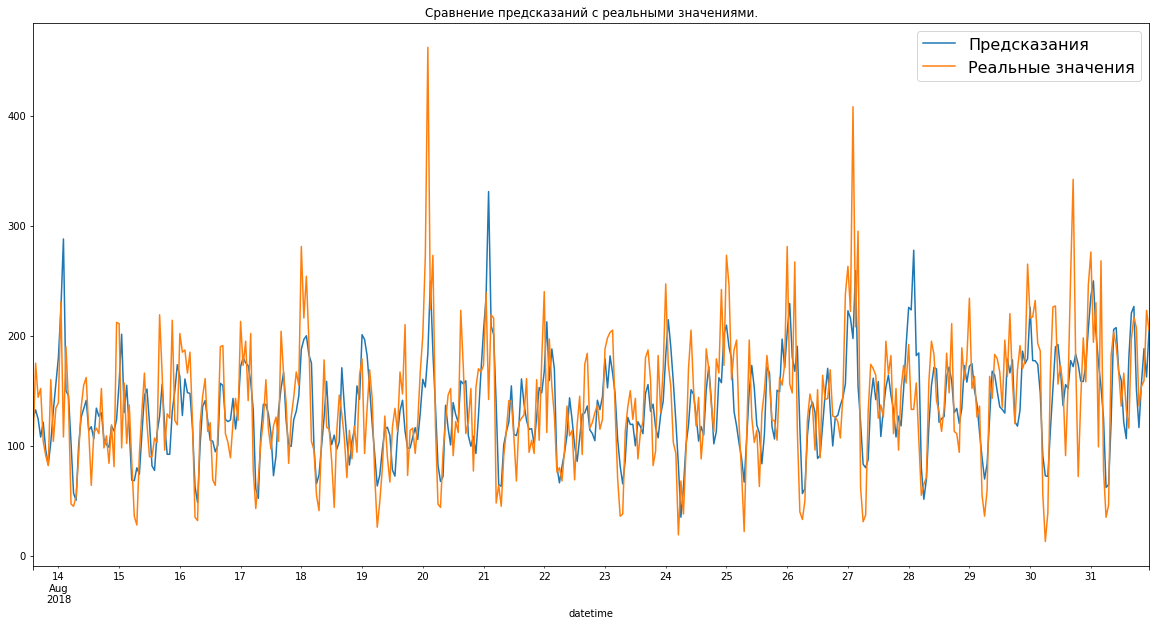

In [25]:
predictions = pd.Series(predictions,index = y_test.index)
plt.figure(figsize=(20,10))
predictions.plot(ax=plt.gca(),label = '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
y_test.plot(label = '–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.legend(fontsize=16)
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.')
plt.show()

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–æ–¥–µ–ª—å –ø—Ä–æ—à–ª–∞ –ø—Ä–æ–≤–µ—Ä–∫—É —Å RMSE –º–µ–Ω—å—à–∏–º 48.–û–Ω–∞ –Ω–∞–º –ø–æ–¥—Ö–æ–¥–∏—Ç.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–•–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–õ—É—á—à—É—é –º–æ–¥–µ–ª—å —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å - –¥–ª—è —ç—Ç–æ–≥–æ —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –º–æ–¥–µ–ª—å, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â—É—é —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä—è–¥–∞ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, –æ—Ü–µ–Ω–∏—Ç—å –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å –∫–∞—á–µ—Å—Ç–≤–æ–º –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ - –≤–¥—Ä—É–≥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —É –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π –º–æ–¥–µ–ª–∏, –≤—Å–µ–≥–¥–∞ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â–µ–π –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ —á–∏—Å–ª–æ, –±—É–¥–µ—Ç —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º –∏–ª–∏ –¥–∞–∂–µ –ª—É—á—à–µ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏? –¢–æ–≥–¥–∞ —Å—Ç–æ–∏–ª–æ –±—ã —á—Ç–æ-—Ç–æ –ø–æ–º–µ–Ω—è—Ç—å –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.
    
–í –∫–∞—á–µ—Å—Ç–≤–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π –º–æ–¥–µ–ª–∏ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html).
        </div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 

–ó–¥–µ—Å—å —Ç–∞–∫–∂–µ –±—ã–ª–æ –±—ã –æ—á–µ–Ω—å –ø–æ–ª–µ–∑–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ç–≤–æ–µ–π –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å –∏—Ö —Å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º–∏ –æ—Ç–≤–µ—Ç–∞–º–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ –ª–∏–Ω–µ–π–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞ - —Ç–∞–∫ –º—ã —Å–º–æ–∂–µ–º –±–æ–ª–µ–µ –Ω–∞–≥–ª—è–¥–Ω–æ –ø–æ–Ω—è—Ç—å, –≤ –∫–∞–∫–∏—Ö –º–µ—Å—Ç–∞—Ö —Ç–≤–æ—è –º–æ–¥–µ–ª—å –¥–µ–ª–∞–µ—Ç —Ö–æ—Ä–æ—à–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –∞ –≤ –∫–∞–∫–∏—Ö –æ—à–∏–±–∞–µ—Ç—Å—è.

</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–ì—Ä–∞—Ñ–∏–∫ –ø–æ—Å—Ç—Ä–æ–µ–Ω!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–û–¥–Ω–∞–∫–æ –ø–æ –æ—Å–∏ X —Å—Ç–æ–∏—Ç –æ—Ç–ª–æ–∂–∏—Ç—å –¥–∞—Ç—É, —Ç–∞–∫ –∫–∞–∫ –º—ã —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º 2 —Ä—è–¥–∞ - —Ä–µ–∞–ª—å–Ω—ã–π –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π - –Ω–∞ –æ–¥–Ω–æ–º –∏ —Ç–æ–º –∂–µ –ø—Ä–æ–º–µ–∂—É—Ç–∫–µ.
    
–î–æ–±–∞–≤–∏—Ç—å –¥–∞—Ç—ã –º–æ–∂–Ω–æ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –æ–±—ä–µ–∫—Ç–∞ `pd.Series` —á–µ—Ä–µ–∑ –æ–±—Ä–∞—â–µ–Ω–∏–µ –∫ –∏–Ω–¥–µ–∫—Å—É, —Å–∫–∞–∂–µ–º, `x_test`:
    
    pred = pd.Series(pred, index=x_test.index)
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–¢–æ, —á—Ç–æ –Ω—É–∂–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 

–ó–¥–µ—Å—å –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è —Å—Ç—Ä–∫—Ç—É—Ä–Ω—ã–π –±–ª–æ–∫ —Ä–∞–±–æ—Ç—ã - —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –≤ –±–ª–æ–∫–µ.

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:<a class="tocSkip"></h2>
<b> –ú—ã –ø—Ä–æ–≤–µ—Ä–∏–ª–∏ –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –Ω–µ –±–æ–ª—å—à–µ 48, –∑–Ω–∞—á–∏—Ç, –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–∞–º –ø–æ–¥—Ö–æ–¥–∏—Ç.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–ï—Å—Ç—å –≤—ã–≤–æ–¥!
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–ù–æ –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø–µ—Ä–µ–¥–µ–ª–∞—Ç—å - –ø–æ–∫–∞ –º–µ—Ç—Ä–∏–∫–∞ –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –≥—Ä–∞–Ω–∏—Ü–µ –ø—Ä–æ–µ–∫—Ç–∞.
</div>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.3 <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b>
–í—Å—ë –µ—â—ë –Ω—É–∂–Ω–∞ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –≤—ã–≤–æ–¥–∞.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.4 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç</b> 
    
–£—á—Ç–µ–Ω–æ!
</div>

<div class="alert alert-warning">
    <h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏‚ö†Ô∏è:</b> 
–ü–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏ –ø—Ä–æ–µ–∫—Ç–∞ —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –∏—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥: –≤ –Ω–µ–≥–æ –º–æ–∂–Ω–æ –≤–∫–ª—é—á–∏—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —à–∞–≥–∏ –ø—Ä–æ–µ–∫—Ç–∞, –∞ —Ç–∞–∫–∂–µ –∫–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤ —Ö–æ–¥–µ —Ä–∞–±–æ—Ç—ã –Ω–∞–¥ –Ω–∏–º.
        </div>

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:\–í—ã–≤–æ–¥<a class="tocSkip"></h2>
<b> –°–Ω–∞—á–∞–ª–∞ –º—ã –ø–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ.–ó–∞—Ç–µ–º –ø—Ä–æ–≤–µ–ª–∏ –∞–Ω–∞–ª–∏–∑. –¢—Ä–µ–Ω–¥ –ø–æ–∫–∞–∑–∞–ª –Ω–∞–º,—á—Ç–æ —Ä—è–¥ —Ä–∞—Å—Ç–µ—Ç —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º, –Ω–∞—à–ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –≤ 4 –¥–Ω—è.–ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –∫ –æ–±—É—á–µ–Ω–∏—é, —É—á–∏—Ç—ã–≤–∞—è —Å–ø–µ—Ü–∏—Ñ–∏–∫—É –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.–û–±—É—á–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.–ù–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–ª—É—á–∏–ª–∏—Å—å –¥–ª—è –õ–∏–Ω–µ–π–Ω–æ–π –†–µ–≥—Ä–µ—Å—Å–∏–∏.–ü—Ä–æ–≤–µ—Ä–∏–ª–∏ –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.–ú–µ—Ç—Ä–∏–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç —É—Å–ª–æ–≤–∏—é.–ú–æ–¥–µ–ª—å –ø—Ä–æ—à–ª–∞ –ø—Ä–æ–≤–µ—Ä–∫—É.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥ —Ç–∞–∫–∂–µ –ø–æ—è–≤–∏–ª—Å—è - –æ—Ç–ª–∏—á–Ω–æ!
</div>

<div class="alert alert-info">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:<a class="tocSkip"></h2>
<b>  –°–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ –∑–∞ –≤–∞—à–∏ –ø–æ–¥—Å–∫–∞–∑–∫–∏ –∏ –ø–æ–ª–µ–∑–Ω—ã–µ —Å—Å—ã–ª–∫–∏.–ü–æ—Å—Ç–∞—Ä–∞–ª—Å—è –≤—ã–ø–æ–ª–Ω–∏—Ç—å, –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–π.–ë—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b>
–í—Å–µ–≥–¥–∞ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ - —Ä–∞–¥, —á—Ç–æ —Ç–µ–±–µ –±—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ:)
</div>

## –ß–µ–∫-–ª–∏—Å—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏

- [x]  Jupyter Notebook –æ—Ç–∫—Ä—ã—Ç
- [ ]  –í–µ—Å—å –∫–æ–¥ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –±–µ–∑ –æ—à–∏–±–æ–∫
- [ ]  –Ø—á–µ–π–∫–∏ —Å –∫–æ–¥–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –ø–æ—Ä—è–¥–∫–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è
- [ ]  –î–∞–Ω–Ω—ã–µ –∑–∞–≥—Ä—É–∂–µ–Ω—ã –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã
- [ ]  –î–∞–Ω–Ω—ã–µ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã
- [ ]  –ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞, –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–æ–±—Ä–∞–Ω—ã
- [ ]  –ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –ø—Ä–æ–≤–µ—Ä–µ–Ω–æ, –≤—ã–≤–æ–¥—ã —Å–¥–µ–ª–∞–Ω—ã
- [ ]  –ó–Ω–∞—á–µ–Ω–∏–µ *RMSE* –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –Ω–µ –±–æ–ª—å—à–µ 48

<div style="border:solid Chocolate 2px; padding: 40px">

# –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞: –æ–±—â–∏–π –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–æ–µ–∫—Ç—É.

–¢–µ–±–µ —É–¥–∞–ª–æ—Å—å –∑–∞–¥–∞—Ç—å –∫–ª–∞—Å—Å–Ω—ã–π —Å—Ç–∞—Ä—Ç —Ä–∞–±–æ—Ç—ã –Ω–∞–¥ –ø—Ä–æ–µ–∫—Ç–æ–º - —Ö–æ—Ä–æ—à–æ –ø–æ—Ä–∞–±–æ—Ç–∞–ª, –º–æ–ª–æ–¥–µ—Ü! –ù–∞ —Å–ª–µ–¥—É—é—â–∏—Ö –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö –∑–∞–π–º—ë–º—Å—è –ø—Ä–∏—á—ë—Å—ã–≤–∞–Ω–∏–µ–º —Ç–≤–æ–µ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞ –∏ –¥–æ–≤–µ–¥–µ–Ω–∏–µ–º –µ–≥–æ —Ç–æ—á–∫–∏ –Ω–∞–∏–≤—ã—Å—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞:)
    
–û—Ç–º–µ—á—É –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–ª—é—Å–æ–≤ —Ç–≤–æ–µ–π —Ä–∞–±–æ—Ç—ã.

–¢—ã –≤–µ—Ä–Ω–æ –≤—ã–ø–æ–ª–Ω–∏–ª –≤—Å–µ –∑–∞–¥–∞–Ω–∏—è –ø—Ä–æ–µ–∫—Ç–∞, –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–æ—à—ë–ª –≤—Å–µ –µ–≥–æ —à–∞–≥–∏, –ø–æ–ª—É—á–∏–ª –≤–µ—Ä–Ω—ã–µ –≤—ã–≤–æ–¥—ã –∏ –Ω–∏—á–µ–≥–æ –Ω–µ —É–ø—É—Å—Ç–∏–ª –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ - —ç—Ç–æ –∫–ª–∞—Å—Å–Ω–æ, —Ç—ã –º–æ–ª–æ–¥–µ—Ü!
    
–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å —Ç–∞–∫–∂–µ, —á—Ç–æ —Ç—ã –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–∏–ª—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –ø—Ä–æ—Å—Ç–µ–Ω—å–∫–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ —Ç–∏–ø–∞ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã–µ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –≤—Ä–æ–¥–µ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞.
    
–ï—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ —É–ª—É—á—à–µ–Ω–∏—é —Ç–≤–æ–µ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞, –∫–∞—Å–∞—é—â–∏–µ—Å—è –∫–∞–∫ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è, —Ç–∞–∫ –∏ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–π —á–∞—Å—Ç–∏ –∏ —á–∞—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã —Å –º–æ–¥–µ–ª—è–º–∏ - —è –æ—Å—Ç–∞–≤–∏–ª –∏—Ö –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö –∂—ë–ª—Ç–æ–≥–æ —Ü–≤–µ—Ç–∞. –ë—É–¥–µ—Ç –∑–¥–æ—Ä–æ–≤–æ, –µ—Å–ª–∏ —Ç—ã —É—á—Ç—ë—à—å —ç—Ç–∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –≤–æ –≤—Ä–µ–º—è —Å–ª–µ–¥—É—é—â–µ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ —Ä–∞–±–æ—Ç—ã –Ω–∞–¥ –ø—Ä–æ–µ–∫—Ç–æ–º - —Ç–æ–≥–¥–∞ —Ü–µ–Ω–Ω–æ—Å—Ç—å —Ç–≤–æ–µ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞ —Å–∏–ª—å–Ω–æ –≤–æ–∑—Ä–∞—Å—Ç—ë—Ç.
    
–¢–∞–∫–∂–µ –≤ –ø—Ä–æ–µ–∫—Ç–µ –µ—Å—Ç—å –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–µ –∑–∞–º–µ—á–∞–Ω–∏—è. –í–∞–∂–Ω–æ —É—Å—Ç—Ä–∞–Ω–∏—Ç—å —ç—Ç–∏ –∑–∞–º–µ—á–∞–Ω–∏—è, —á—Ç–æ–±—ã –ø—Ä–æ–µ–∫—Ç –±—ã–ª –ø—Ä–∏–Ω—è—Ç. –ö –Ω–∏–º —è –æ—Å—Ç–∞–≤–∏–ª –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∫—Ä–∞—Å–Ω–æ–≥–æ —Ü–≤–µ—Ç–∞, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ–ø–∏—Å–∞–Ω—ã –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–ª—è —É—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –∑–∞–º–µ—á–∞–Ω–∏–π –¥–µ–π—Å—Ç–≤–∏—è.  
    
–ï—Å–ª–∏ –ø–æ —Ç–æ–º—É, —á—Ç–æ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, –±—É–¥—É—Ç –≤–æ–ø—Ä–æ—Å—ã - –æ—Å—Ç–∞–≤—å –∏—Ö, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö, –∏ —è –æ—Ç–≤–µ—á—É –Ω–∞ –Ω–∏—Ö –≤–æ –≤—Ä–µ–º—è —Å–ª–µ–¥—É—é—â–µ–≥–æ —Ä–µ–≤—å—é:)
    
–¢–∞–∫–∂–µ –±—É–¥—É —Ä–∞–¥ –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –ª—é–±—ã–µ —Ç–≤–æ–∏ –≤–æ–ø—Ä–æ—Å—ã –ø–æ –ø—Ä–æ–µ–∫—Ç—É –∏–ª–∏ –Ω–∞ –∫–∞–∫–∏–µ-–ª–∏–±–æ –¥—Ä—É–≥–∏–µ, –µ—Å–ª–∏ –æ–Ω–∏ —É —Ç–µ–±—è –∏–º–µ—é—Ç—Å—è - –æ—Å—Ç–∞–≤—å –∏—Ö –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö, –∏ —è –ø–æ—Å—Ç–∞—Ä–∞—é—Å—å –æ—Ç–≤–µ—Ç–∏—Ç—å:)
    
–ñ–¥—É —Ç–≤–æ–π –ø—Ä–æ–µ–∫—Ç –Ω–∞ –ø–æ–≤—Ç–æ—Ä–Ω–æ–º —Ä–µ–≤—å—é. –î–æ –≤—Å—Ç—Ä–µ—á–∏:)

<div style="border:solid Chocolate 2px; padding: 40px">

# –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞: –æ–±—â–∏–π –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–æ–µ–∫—Ç—É v.2.

–®–∞—Ä—É—Ö–∞–Ω, —Å–ø–∞—Å–∏–±–æ, —á—Ç–æ –ø—Ä–∏—Å–ª–∞–ª –ø—Ä–æ–µ–∫—Ç –Ω–∞ –ø–æ–≤—Ç–æ—Ä–Ω–æ–µ —Ä–µ–≤—å—é: —á–∞—Å—Ç—å –∑–∞–º–µ—á–∞–Ω–∏–π –±—ã–ª–∞ —É—á—Ç–µ–Ω–∞, –ø—Ä–æ–µ–∫—Ç —Å—Ç–∞–ª –ª—É—á—à–µ!
    
–û–¥–Ω–∞–∫–æ –µ—â—ë –µ—Å—Ç—å –Ω–∞–¥ —á–µ–º –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å - –∞–∫—Ç—É–∞–ª—å–Ω—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è —É–∫–∞–∑–∞–Ω—ã –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö —Å –º–µ—Ç–∫–æ–π `v.2`. 
    
–ñ–¥—É —Ç–µ–±—è —Å–Ω–æ–≤–∞:)

<div style="border:solid Chocolate 2px; padding: 40px">

# –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞: –æ–±—â–∏–π –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–æ–µ–∫—Ç—É v.3.

–®–∞—Ä—É—Ö–∞–Ω, —Å–ø–∞—Å–∏–±–æ, —á—Ç–æ —Å–Ω–æ–≤–∞ –ø—Ä–∏—Å–ª–∞–ª –ø—Ä–æ–µ–∫—Ç - —á–∞—Å—Ç—å –≤–æ–ø—Ä–æ—Å–æ–≤ –∑–∞–∫—Ä—ã–ª–∏, –æ—Ç–ª–∏—á–Ω–æ –ø–æ—Å—Ç–∞—Ä–∞–ª—Å—è!
    
–ü—Ä–æ–¥–æ–ª–∂–∞–µ–º —Ä–∞–±–æ—Ç—É –Ω–∞–¥ –ø—Ä–æ–µ–∫—Ç–æ–º - –∞–∫—Ç—É–∞–ª—å–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –≤ —è—á–µ–π–∫–∞—Ö —Å –ø–æ–¥–ø–∏—Å—å—é `v.3`.
    
–ñ–¥—É —Ç–µ–±—è —Å–Ω–æ–≤–∞:)

<div style="border:solid Chocolate 2px; padding: 40px">

# –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞: –æ–±—â–∏–π –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–æ–µ–∫—Ç—É v.4.

–®–∞—Ä—É—Ö–∞–Ω, —Ç–µ–ø–µ—Ä—å –ø–æ –ø—Ä–æ–µ–∫—Ç—É –Ω–µ—Ç –≤–æ–ø—Ä–æ—Å–æ–≤ - —Ä–∞–±–æ—Ç–∞ –ø—Ä–∏–Ω—è—Ç–∞!
    
–°–ø–∞—Å–∏–±–æ –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –Ω–∞–¥ –ø—Ä–æ–µ–∫—Ç–æ–º, –∂–µ–ª–∞—é —É—Å–ø–µ—Ö–æ–≤ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –æ–±—É—á–µ–Ω–∏–∏:)